<a href="https://colab.research.google.com/github/Tin1209/Study-Pytorch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀분석(Linear Regression)   
   
   
## 1. 선형회귀분석이란?   

선형회귀분석이란 주어진 데이터를 가장 잘 설명하는 하나의 직선을 찾는 것이다.  
하나의 독립변수에 대하여 선형회귀분석을 하는 경우 __단순선형회귀(simple linear regression)__라 하며,   
여러개의 독립변수에 대하여 선형회귀분석을 하는 경우 __다중선형회귀(multivariate linear regression)__이라 한다.  

단순선형회귀분석은 $x$와 $y$라는 데이터가 주어졌을때, 데이터를 가장 잘 표현하는 $y = wx + b$ 꼴의 직선을 찾는 것이다.   
여기서 $w$는 __가중치(weight)__, $b$는 __편차(bias)__라 한다.    


## 2. 손실 함수 및 경사하강법   
  

데이터를 가장 잘 표현한다는 말을 수학적으로 표현하면 $y = wx + b$ 를 통해 예측한 $\hat{y}$ 와 실제 결과값 $y$를 비교하는 것이다.   
이때 비교하는 방법 중 대표적인 것으로 __평균제곱오차(mean squared error-MSE)__가 있다.  
평균제곱오차 식은 다음과 같다.  $$MSE = \frac{1} {n}  \sum_{i = 1}^n (\hat{y} - y)^2$$   
이렇게 오차를 나타내는 함수를 흔히 __손실 함수(Loss function)__ 또는 __비용 함수(Cost function)__ 이라고 한다. MSE는 이러한 Cost function 중에 하나이다. 

여기서 Cost function을 최소화하는 $w$와 $b$를 찾기위해 __경사하강법(Gradient descent)__이라는 방법을 사용한다. 여기서 경사란 함수의 기울기를 의미한다.   
Cost function에서 주어진 $w$에 대한 기울기를 구하고, 그 기울기를 바탕으로 다음 $w$를 업데이트 함으로써 오차의 극솟값을 찾아준다. 식으로 표현하면 다음과 같다.
$$ w_{t+1} = w_{t} - gradient * learning\ rate $$  
여기서 __학습률(learning rate)__이 새로 나오는데, 학습률은 변수 $w$를 얼마나 업데이트할지 결정하는 수치이다.   

## 3. 파이토치에서 경사하강법  

파이토치에서는 데이터의 기본 단위로 다차원 배열인 텐서(Tensor)를 사용한다.   


In [14]:
import torch
X = torch.Tensor(2, 3)
print(X)

tensor([[3.8342e-35, 0.0000e+00, 1.5695e-43],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


위의 코드를 실행시키면 1행에서는 파이토치의 프레임워크를 불러오고,  
2행에서는 X라는 변수에 임의의 난수를 원소로 갖는 2x3 형태의 텐서를 생성해서 지정한다.    

In [15]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X)

tensor([[1, 2, 3],
        [4, 5, 6]])


위의 코드처럼 텐서를 생성할때 직접 shape과 element들을 지정해줄 수 있다.   
torch.tensor 함수는 인수로 data, dtype, device, requires_grad 등을 받는다.  
data에는 위의 코드처럼 배열이 들어가고,  
dtype에는 데이터의 자료형이 들어간다. 자료형을 지정해주지 않을시 기본 자료형은 Float로 들어간다. 
device에는 이 텐서를 어느 기기에 올릴 것인지를 명시한다.   
requires_grad는 이 텐서에 대한 기울기를 저장할지에 대한 여부를 지정한다.  

아래의 코드는 기울기를 계산하는 코드이다. 

In [5]:
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)
y = x**2
z = 2*y + 3

target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()

print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if __name__ == '__main__':


위의 식을 정리해보면 $z = 2x^2 + 3$의 식에서 $x$에 대한 기울기를 구하는 코드이다.  
z와 target의 절댓값 차이를 계산한 후 torch.sum()을 통해 1x2 형태의 두 값의 차이를 하나의 숫자로 바꿨다.  
다음 loss.backward() 함수를 호출해 연산 그래프를 따라가면서 leaf node인 $x$에 대한 기울기를 계산한다.  
$x$에 대한 종속변수인 $y$나 $z$와는 달리 그 자체가 데이터 값을 갖는 $x$같은 변수들을 __leaf node__라고 한다.  
코드의 마지막줄을 실행하면 x.grad는 결과값이 나오지만, y와 z는 leaf node가 아니기때문에 None값이 리턴된다.  

다음은 선형회귀분석 모델을 만들어 기울기를 계산하고 $w$와 $b$를 업데이트하는 전체 과정을 담은 코드이다.  


In [17]:
import torch.nn as nn # 신경망 모델들이 포함되어 있음. 여기서는 선형 변환 함수인 Linear 함수를 사용 
import torch.optim as optim # gradient descent 알고리즘이 들어가있는 모듈 
import torch.nn.init as init # 텐서에 초기값을 주기 위해 필요한 함수들이 들어있는 모듈 
import matplotlib.pyplot as plt # 데이터 시각화를 위해 사용하는 모듈 

In [7]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data, 1), -10, 10) 
noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
y = 2*x + 3
y_noise = 2*(x + noise) + 3

num_data에는 총 데이터의 개수, num_epoch에는 gradient descent를 반복할 횟수를 저장한다.  
x라는 변수에는 [num_data, 1] 모양의 텐서를 생성하고, 원소에는 -10부터 10까지 임의의 수를 균등하게 넣는다.(init_uniform_)  

y값에 노이즈를 추가하기 위해서 y_noise 라는 변수를 따로 만들어주었고, noise의 값은 정규분포 형태를 따르는 가우시안 노이즈를 사용하였다. init_normal_(mean=0(default), std = 1) 




In [8]:
model = nn.Linear(1, 1)
loss_func = nn.L1Loss()

nn.Linear() 함수를 통해 선형회귀 모델을 만들어준다. 파라미터 값으로는 들어오는 데이터의 특성 개수와, 결과값의 특성 개수를 받는다.  
L1Loss는 우리가 앞에서 살펴본 MSE와 같다.  

In [9]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

다음에는 gradient descent를 사용하기 위해서 torch.optim에서 SGD optimizer를 불러온다.   
optimizer는 최적화 함수를 뜻하며 gradient descent를 이용하여 오차를 줄이고 최적의 $w$와 $b$를 근사할 수 있게 한다.  
model.parameters()를 이용하여 $w$와 $b$를 최적화 할 변수로 전달하고, lr = 0.01로 학습률을 전달한다.    


In [20]:
label = y_noise
loss_arr = []
for i in range(num_epoch): # num_epoch만큼 최적화 과정 반복  
  optimizer.zero_grad() # 기울기를 0으로 초기화  
  output = model(x) # 모델에 x를 전달 

  loss = loss_func(output, label) # output과 y_noise의 차이를 저장 
  loss.backward() # w와 b에 대한 기울기를 계산  
  optimizer.step() # w와 b를 기울기에 따라 업데이트 

  if i % 10 == 0:
    print(loss.data)
    param_list = list(model.parameters())
    print(param_list[0].item(), param_list[1].item())
  
  loss_arr.append(loss.detach().numpy())

tensor(1.6449)
2.0008463859558105 3.0776894092559814
tensor(1.6449)
2.0009021759033203 3.0780298709869385
tensor(1.6449)
2.00095796585083 3.0783703327178955
tensor(1.6449)
2.00101375579834 3.0787107944488525
tensor(1.6449)
2.0010695457458496 3.0790512561798096
tensor(1.6449)
2.0011253356933594 3.0793917179107666
tensor(1.6449)
2.001181125640869 3.0797321796417236
tensor(1.6449)
2.001138210296631 3.080082654953003
tensor(1.6449)
2.0011940002441406 3.08042311668396
tensor(1.6449)
2.0012497901916504 3.080763578414917
tensor(1.6449)
2.00130558013916 3.081104040145874
tensor(1.6449)
2.00136137008667 3.081444501876831
tensor(1.6449)
2.0014171600341797 3.081784963607788
tensor(1.6449)
2.0014729499816895 3.082125425338745
tensor(1.6449)
2.001331329345703 3.0824859142303467
tensor(1.6449)
2.0013794898986816 3.0827062129974365
tensor(1.6449)
2.001461982727051 3.0828263759613037
tensor(1.6449)
2.0015037059783936 3.0829265117645264
tensor(1.6449)
2.001347780227661 3.0830466747283936
tensor(1.6449)

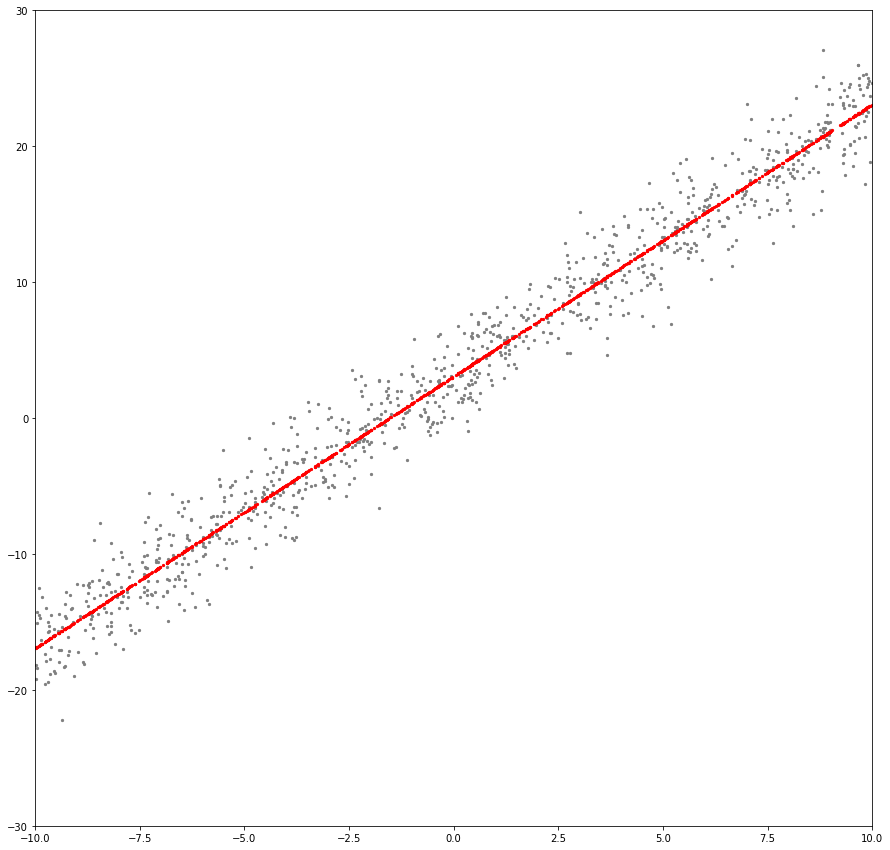

In [18]:
# 학습 이후 데이터 시각화  
plt.figure(figsize = (15, 15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

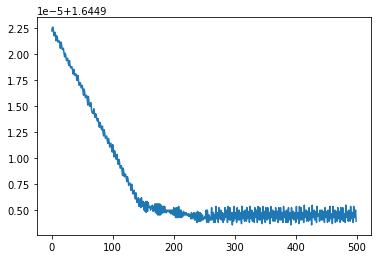

In [21]:
# 손실 함수 
plt.plot(loss_arr)
plt.show()

In [22]:
# 학습 이후 변수값 확인 
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias:  ",param_list[1].item())

Weight: 2.0015835762023926 
Bias:   3.0838677883148193
